Імпортування модулів:

In [1]:
import pandas as pd
import copy

Завантаження файлів у dataframe:

In [2]:
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

Видалення колонок з коментарями:

In [3]:
trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])

Перевірка наявності NULL значень:

In [4]:
print(trains_dataframe.isnull().values.any())

True


Візуалізація 10 значень з 4 колонок:

In [5]:
visualisation = trains_dataframe[0:11].style.hide(['Year', 'Month', 'Departure station', 'Arrival station',
                                             'Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min', 'Period',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Period'], axis="columns")

visualisation.highlight_max(color='green').highlight_min(color='red')

,Average travel time (min),Number of trains late on arrival,Average delay of all arriving trains (min),Average train delay > 15min
0,131.914980,41.000000,5.233333,32.965873
1,175.611570,47.000000,6.123967,32.057143
2,62.395349,91.000000,4.430194,42.367241
3,172.421053,15.000000,3.812135,27.620833
4,67.310000,73.000000,4.176208,37.658333
5,266.594737,28.000000,8.422105,47.343452
6,265.262887,29.000000,8.407474,45.610920
7,85.399381,52.000000,5.523633,60.874405
8,46.305556,36.000000,5.154244,47.841667
9,67.000000,30.000000,3.633051,35.613889


Перезавантаження данних у dataframe, видалення колонок з коментарями та рядків із NULL значеннями. Оскільки менше 5% рядків містять NULL значення та оскільки більшість рядків з NULL значеннями мають більше половини NULL значень, то їх можна видалити.

In [6]:
del trains_dataframe
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])
trains_dataframe = trains_dataframe.dropna()
print(trains_dataframe.isnull().values.any())
trains_dataframe_numerical = trains_dataframe.drop(columns=['Year', 'Month', 'Departure station', 'Arrival station','Period'])

False


Функція стандартизації колонки значень:

In [7]:
def standartizatinator(input_column):
    mean = input_column.mean()
    
    variation = input_column.var()
    
    return (input_column - mean)/variation

Використання створеної функції:

In [8]:
trains_dataframe_numerical_standart = trains_dataframe_numerical
trains_dataframe_numerical_standart = standartizatinator(trains_dataframe_numerical)

Імпортування бібліотек для візуалізації даних:

In [9]:
#import seaborn as waluigi
import seaborn as sns
import matplotlib.pyplot as plt

Створення lineplot для перших 100 значень середньої тривалості поїздки та середньої затримки у стандартизованих значеннях:

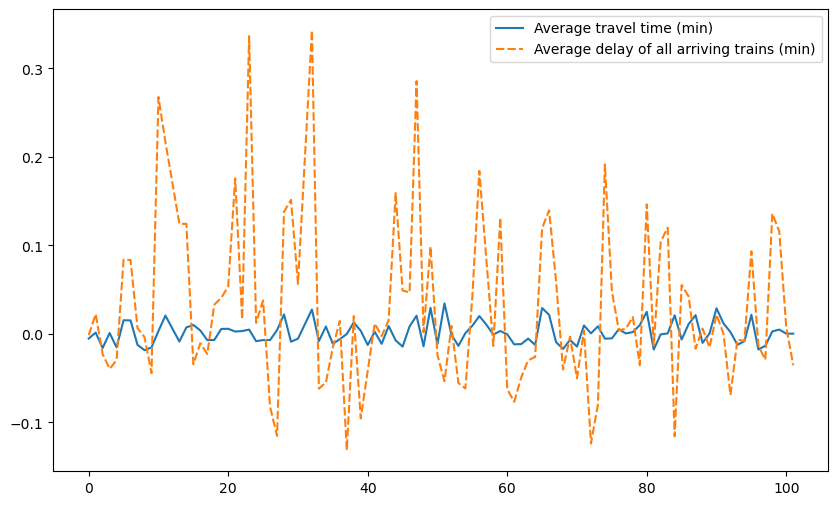

In [10]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(trains_dataframe_numerical_standart.drop(['Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Number of trains late on arrival','Average train delay > 15min'],axis='columns')[0:100])

Створення barplot для відношення кількості потягів, які відправились з затримкою, до станцій

<Axes: xlabel='Departure station', ylabel='Number of late trains at departure'>

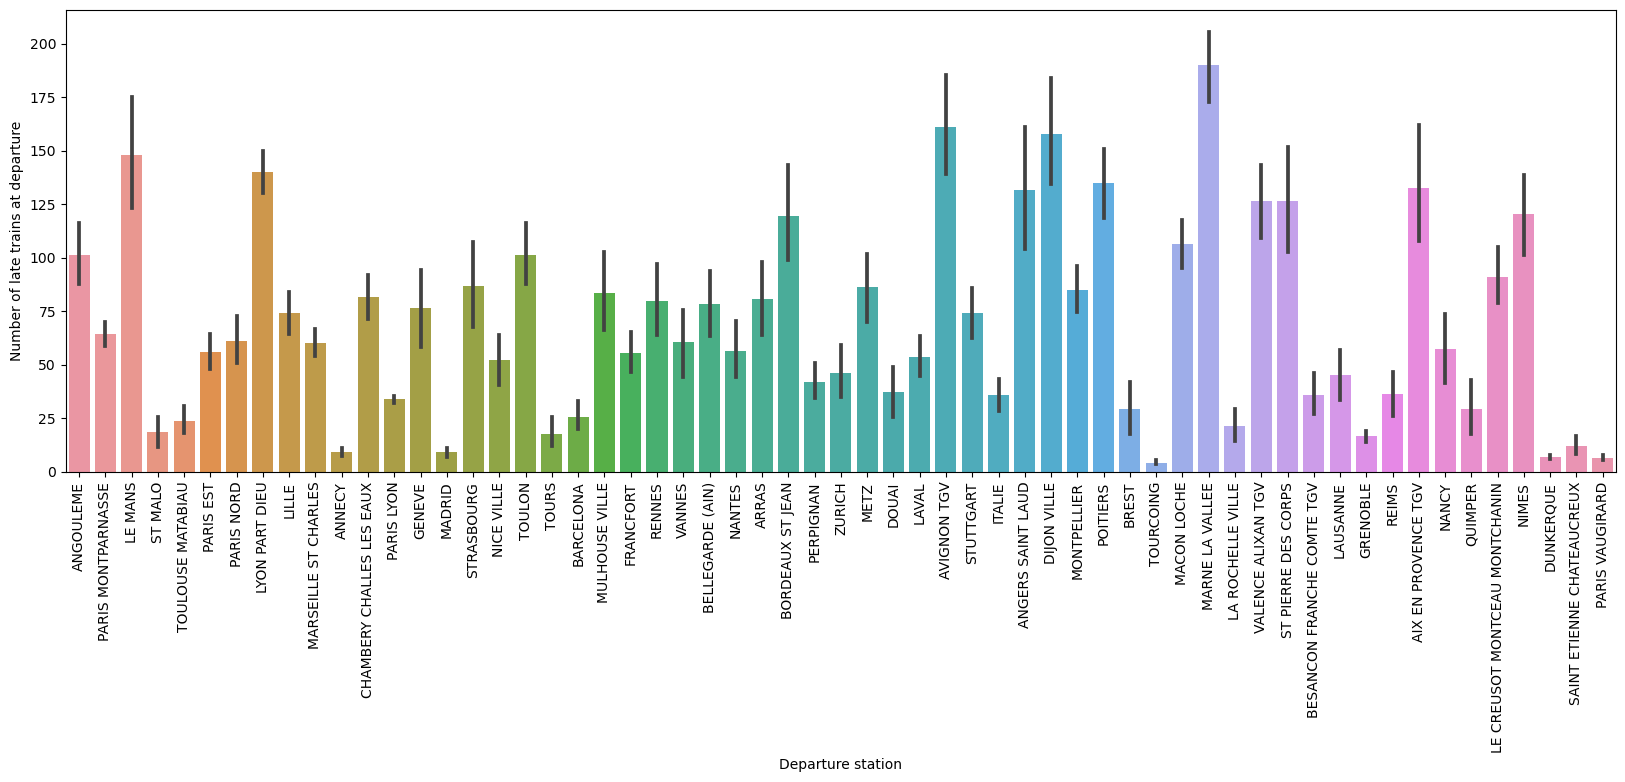

In [11]:
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x = trains_dataframe['Departure station'], y = trains_dataframe_numerical['Number of late trains at departure'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
barplot

Створення heatmap для відношення середніх тривалостей поїздок до маршрутів:
не працює :(

<Axes: xlabel='None-Departure station', ylabel='Arrival station'>

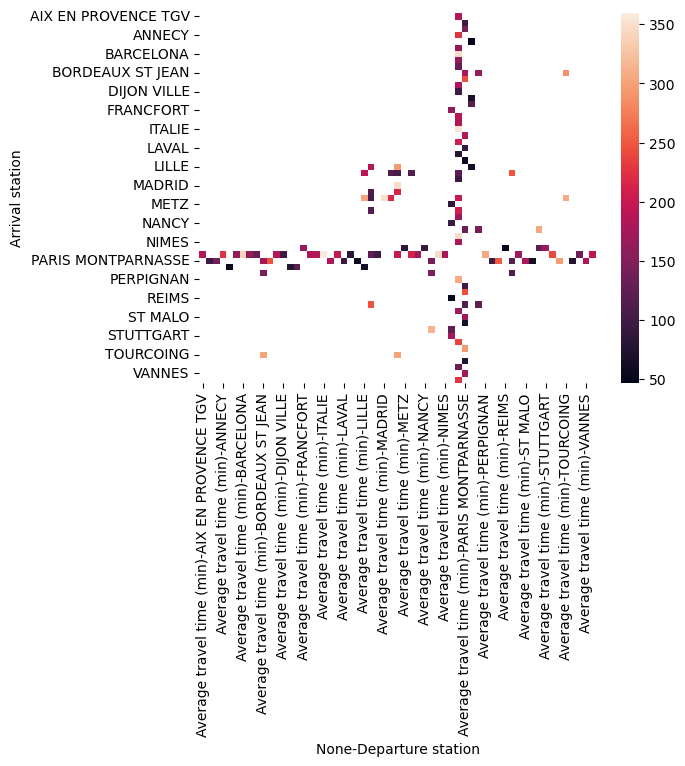

In [12]:
heatmap_df = trains_dataframe
heatmap_df = heatmap_df.drop(['Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Number of trains late on arrival','Average train delay > 15min','Year','Month','Period','Average delay of all arriving trains (min)'],axis='columns')
heatmap_grouped = heatmap_df.groupby([heatmap_df['Departure station'],heatmap_df['Arrival station']], as_index=False).mean()
heatmap_table = heatmap_grouped.pivot(index = 'Arrival station', columns = 'Departure station')
sns.heatmap(heatmap_table)

Гістограмма середньої затримки прибуваючих потягів для перших 200 потягів

<Axes: xlabel='Departure station'>

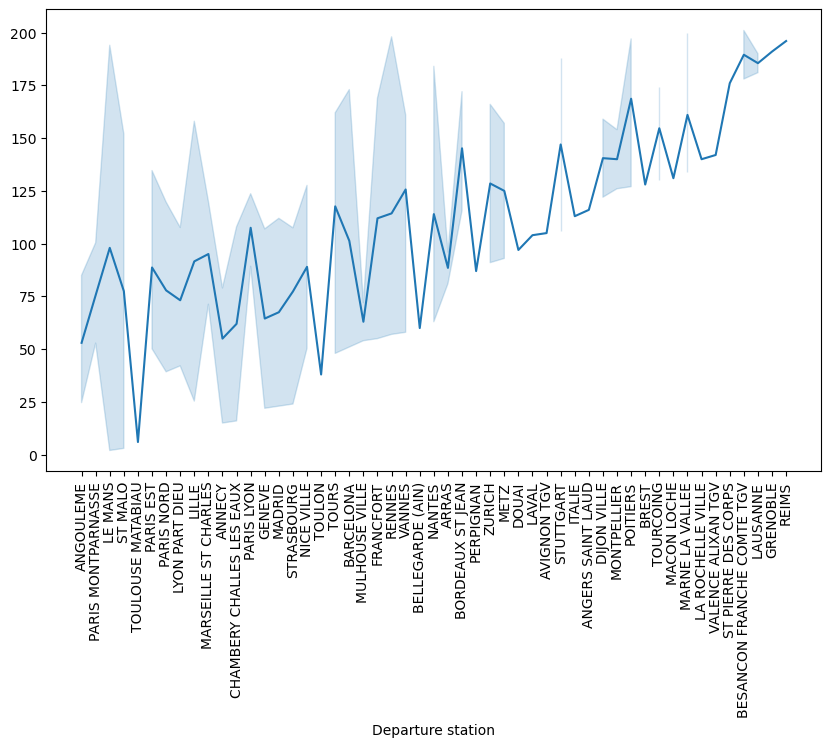

In [13]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(trains_dataframe_numerical.drop(['Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Number of trains late on arrival','Average train delay > 15min','Average travel time (min)'],axis='columns')[0:200],x = trains_dataframe['Departure station'][0:200], y=trains_dataframe.index[0:200])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
lineplot